In [69]:
#Loading necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle
import warnings
warnings.filterwarnings('ignore')

In [70]:
df_defending =  pd.read_csv(r'C:\Users\dell\Desktop\Vijaya\clfootball\defending.csv')
df_key_stats =  pd.read_csv(r'C:\Users\dell\Desktop\Vijaya\clfootball\key_stats.csv')
df_attacking =  pd.read_csv(r'C:\Users\dell\Desktop\Vijaya\clfootball\attacking.csv')
df_goalkeeping = pd.read_csv(r'C:\Users\dell\Desktop\Vijaya\clfootball\goalkeeping.csv')
df_disciplinary = pd.read_csv(r'C:\Users\dell\Desktop\Vijaya\clfootball\disciplinary.csv')
df_goals = pd.read_csv(r'C:\Users\dell\Desktop\Vijaya\clfootball\goals.csv')
df_attempts = pd.read_csv(r'C:\Users\dell\Desktop\Vijaya\clfootball\attempts.csv')
df_distribution = pd.read_csv(r'C:\Users\dell\Desktop\Vijaya\clfootball\distributon.csv')

In [71]:
df = {'df_defending' : df_defending,
'df_key_stats' : df_key_stats,
'df_attacking' : df_attacking,
'df_goalkeeping' : df_goalkeeping, 
'df_disciplinary' : df_disciplinary, 
'df_goals' : df_goals,
'df_attempts' : df_attempts,
'df_distribution' : df_distribution}

In [72]:
for x,y in df.items():
    print(x)
    display(y.head())

df_defending


,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12
2,1,Reinildo,Atlético,Defender,76,13,6,7,20,10
3,4,Fabinho,Liverpool,Midfielder,74,23,9,14,8,13
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12


df_key_stats


,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4


df_attacking


,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13
2,2,Sané,Bayern,Midfielder,6,3,3,32,10
3,4,Antony,Ajax,Forward,5,3,4,28,7
4,5,Alexander-Arnold,Liverpool,Defender,4,36,0,9,9


df_goalkeeping


,serial,player_name,club,position,saved,conceded,saved_penalties,cleansheets,punches made,match_played
0,1,Courtois,Real Madrid,Goalkeeper,61,14,1,5,4,13
1,2,Rulli,Villarreal,Goalkeeper,41,16,0,3,12,12
2,3,Vlachodimos,Benfica,Goalkeeper,38,17,1,5,5,10
3,4,Athanasiadis,Sheriff,Goalkeeper,29,8,0,1,2,5
4,5,Mignolet,Club Brugge,Goalkeeper,28,20,0,0,1,6


df_disciplinary


,serial,player_name,club,position,fouls_committed,fouls_suffered,red,yellow,minutes_played,match_played
0,1,João Palhinha,Sporting CP,Midfielder,23,17,2,0,534,6
1,2,Capoue,Villarreal,Midfielder,19,17,3,1,1046,12
2,2,Rodri,Man. City,Midfielder,19,4,2,0,842,10
3,2,Seiwald,Salzburg,Midfielder,19,3,2,0,649,8
4,5,Balanta,Club Brugge,Midfielder,18,3,4,0,407,5


df_goals


,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


df_attempts


,serial,player_name,club,position,total_attempts,on_target,off_target,blocked,match_played
0,1,Benzema,Real Madrid,Forward,45,23,13,9,12
1,2,Salah,Liverpool,Forward,42,22,11,9,13
2,3,Mahrez,Man. City,Midfielder,37,18,8,11,12
3,4,Sané,Bayern,Midfielder,33,13,12,8,10
4,5,Lewandowski,Bayern,Forward,31,19,8,4,10


df_distribution


,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
0,1,Erokhin,Zenit,Midfielder,98.0,27,26,0,2,0,0,6
1,2,Eric García,Barcelona,Defender,97.5,203,197,0,0,0,1,4
2,3,Ulreich,Bayern,Goalkeeper,97.0,32,31,0,0,0,1,1
3,4,Rugani,Juventus,Defender,96.8,130,122,0,0,0,0,4
4,5,J. Timber,Ajax,Midfielder,95.8,497,474,0,1,0,14,8


finding null values

In [73]:
for m,n in df.items():
    print(m)
    display(n.isnull().sum())

df_defending


serial                 0
player_name            0
club                   0
position               0
balls_recoverd         0
tackles                0
t_won                  0
t_lost                 0
clearance_attempted    0
match_played           0
dtype: int64

df_key_stats


player_name         0
club                0
position            0
minutes_played      0
match_played        0
goals               0
assists             0
distance_covered    0
dtype: int64

df_attacking


serial          0
player_name     0
club            0
position        0
assists         0
corner_taken    0
offsides        0
dribbles        0
match_played    0
dtype: int64

df_goalkeeping


serial             0
player_name        0
club               0
position           0
saved              0
conceded           0
saved_penalties    0
cleansheets        0
punches made       0
match_played       0
dtype: int64

df_disciplinary


serial             0
player_name        0
club               0
position           0
fouls_committed    0
fouls_suffered     0
red                0
yellow             0
minutes_played     0
match_played       0
dtype: int64

df_goals


serial           0
player_name      0
club             0
position         0
goals            0
right_foot       0
left_foot        0
headers          0
others           0
inside_area      0
outside_areas    0
penalties        0
match_played     0
dtype: int64

df_attempts


serial            0
player_name       0
club              0
position          0
total_attempts    0
on_target         0
off_target        0
blocked           0
match_played      0
dtype: int64

df_distribution


serial             0
player_name        0
club               0
position           0
pass_accuracy      0
pass_attempted     0
pass_completed     0
cross_accuracy     0
cross_attempted    0
cross_complted     0
freekicks_taken    0
match_played       0
dtype: int64

> Observation: All the entities are perfectly given. 

In [74]:
df_defending_MC = df_defending.loc[df_defending["club"] == "Man. City"].drop("serial", axis = 1 )
df_key_stats_MC = df_key_stats.loc[df_key_stats["club"] == "Man. City"]
df_attacking_MC = df_attacking.loc[df_attacking["club"] == "Man. City"].drop("serial", axis = 1 )
df_goalkeeping_MC = df_goalkeeping.loc[df_goalkeeping["club"] == "Man. City"].drop("serial", axis = 1 )
df_disciplinary_MC = df_disciplinary.loc[df_disciplinary["club"] == "MaN. City"].drop("serial", axis = 1 )
df_goals_MC = df_goals.loc[df_goals["club"] == "Man. City"].drop(["serial", "match_played"], axis = 1 )
df_attempts_MC = df_attempts.loc[df_attempts["club"] == "Man. City"].drop("serial", axis = 1 )
df_distribution_MC = df_distribution.loc[df_distribution["club"] == "Man. City"].drop("serial", axis = 1 )

In [75]:
df_MC = {"df_defending_MC":df_defending_MC,
"df_key_stats_MC":df_key_stats_MC,
"df_attacking_MC": df_attacking_MC,
"df_goalkeeping_MC": df_goalkeeping_MC, 
"df_disciplinary_MC": df_disciplinary_MC,
"df_goals_MC": df_goals_MC,
"df_attempts_MC": df_attempts_MC,
"df_distribution_MC": df_distribution_MC}

In [76]:
for k,q in df_MC.items():
    print(k)
    display(q)

df_defending_MC


,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
9,João Cancelo,Man. City,Defender,56,9,6,3,13,9
14,Rodri,Man. City,Midfielder,52,14,10,4,5,10
17,Laporte,Man. City,Defender,51,5,1,4,17,9
33,Rúben Dias,Man. City,Defender,45,11,1,10,16,8
87,Walker,Man. City,Defender,34,3,1,2,11,7
93,Stones,Man. City,Defender,33,1,1,0,8,8
103,Zinchenko,Man. City,Defender,31,6,2,4,8,8
152,Bernardo Silva,Man. City,Midfielder,25,9,4,5,5,11
200,Mahrez,Man. City,Midfielder,20,6,1,5,3,12
213,Aké,Man. City,Defender,19,3,3,0,19,6


df_key_stats_MC


,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
58,Ederson,Man. City,Goalkeeper,1003,11,0,0,51.6
59,Mahrez,Man. City,Midfielder,986,12,7,2,120.1
65,Bernardo Silva,Man. City,Midfielder,878,11,3,3,120.3
68,Rodri,Man. City,Midfielder,842,10,0,0,114.6
69,João Cancelo,Man. City,Defender,840,9,2,3,100.3
77,Laporte,Man. City,Defender,794,9,0,0,90.9
81,De Bruyne,Man. City,Midfielder,734,10,2,4,95.5
105,Rúben Dias,Man. City,Defender,664,8,0,0,83.1
107,Gündoğan,Man. City,Midfielder,660,10,0,2,86.4
109,Foden,Man. City,Midfielder,658,11,3,2,89.1


df_attacking_MC


,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
5,De Bruyne,Man. City,Midfielder,4,18,0,14,10
17,Bernardo Silva,Man. City,Midfielder,3,2,3,18,11
21,João Cancelo,Man. City,Defender,3,0,2,26,9
23,Mahrez,Man. City,Midfielder,2,30,5,28,12
26,Gündoğan,Man. City,Midfielder,2,16,1,3,10
28,Foden,Man. City,Midfielder,2,13,6,12,11
49,Sterling,Man. City,Forward,2,0,6,14,12
62,Fernandinho,Man. City,Midfielder,2,0,0,1,8
84,Grealish,Man. City,Midfielder,1,3,6,18,7
95,Zinchenko,Man. City,Defender,1,1,0,3,8


df_goalkeeping_MC


,player_name,club,position,saved,conceded,saved_penalties,cleansheets,punches made,match_played
18,Ederson,Man. City,Goalkeeper,14,14,0,4,1,11
46,Steffen,Man. City,Goalkeeper,3,2,0,0,1,1
52,Carson,Man. City,Goalkeeper,1,0,0,1,0,1


df_disciplinary_MC


,player_name,club,position,fouls_committed,fouls_suffered,red,yellow,minutes_played,match_played


df_goals_MC


,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties
5,Mahrez,Man. City,Midfielder,7,1,4,2,0,7,0,2
15,Jesus,Man. City,Forward,4,4,0,0,0,4,0,0
27,Sterling,Man. City,Forward,3,2,1,0,0,2,1,0
28,Foden,Man. City,Midfielder,3,2,0,1,0,3,0,0
36,Bernardo Silva,Man. City,Midfielder,3,0,3,0,0,3,0,0
48,João Cancelo,Man. City,Defender,2,2,0,0,0,1,1,0
57,De Bruyne,Man. City,Midfielder,2,1,0,1,0,2,0,0
90,Grealish,Man. City,Midfielder,1,1,0,0,0,1,0,0
93,Walker,Man. City,Defender,1,1,0,0,0,1,0,0
150,Palmer,Man. City,Midfielder,1,0,1,0,0,1,0,0


df_attempts_MC


,player_name,club,position,total_attempts,on_target,off_target,blocked,match_played
2,Mahrez,Man. City,Midfielder,37,18,8,11,12
16,De Bruyne,Man. City,Midfielder,24,7,9,8,10
19,Foden,Man. City,Midfielder,22,9,7,6,11
28,Sterling,Man. City,Forward,17,6,9,2,12
42,Gündoğan,Man. City,Midfielder,14,2,4,8,10
70,João Cancelo,Man. City,Defender,11,4,3,4,9
88,Grealish,Man. City,Midfielder,10,3,0,7,7
97,Jesus,Man. City,Forward,9,7,1,1,8
132,Bernardo Silva,Man. City,Midfielder,7,4,2,1,11
166,Stones,Man. City,Defender,6,1,4,1,8


df_distribution_MC


,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
5,Egan-Riley,Man. City,Defender,95.0,61,58,0,1,0,0,1
9,Laporte,Man. City,Defender,94.7,707,672,0,0,0,10,9
13,Stones,Man. City,Defender,94.4,545,523,0,1,0,8,8
15,Rodri,Man. City,Midfielder,94.2,806,760,0,1,0,13,10
40,Rúben Dias,Man. City,Defender,92.6,464,431,0,0,0,8,8
51,Steffen,Man. City,Goalkeeper,92.0,25,23,0,0,0,3,1
56,Bernardo Silva,Man. City,Midfielder,91.6,462,427,23,17,4,5,11
70,Gündoğan,Man. City,Midfielder,90.8,406,367,33,15,5,7,10
81,Aké,Man. City,Defender,90.3,259,244,0,0,0,7,6
103,Ederson,Man. City,Goalkeeper,89.9,318,277,0,0,0,21,11


 We will merge all the datasets into 'df' variable. We have to be careful on and how arguments in the merge method

In [77]:
df = df_defending_MC.merge(df_key_stats_MC, on = ["player_name", "club", "position", "match_played"], how = "outer")\
.merge(df_attacking_MC, on = ["player_name", "club", "position", "match_played", "assists"], how = "outer")\
.merge(df_goalkeeping_MC, on = ["player_name", "club", "position", "match_played"], how = "outer")\
.merge(df_disciplinary_MC, on = ["player_name", "club", "position", "match_played", "minutes_played"], how = "outer")\
.merge(df_goals_MC, on = ["player_name", "club", "position", "goals"], how = "outer")\
.merge(df_attempts_MC, on = ["player_name", "club", "position", "match_played"], how = "outer")\
.merge(df_distribution_MC, on = ["player_name", "club", "position", "match_played"], how = "outer")


In [78]:
df

,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played,minutes_played,...,on_target,off_target,blocked,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken
0,João Cancelo,Man. City,Defender,56.0,9.0,6.0,3.0,13.0,9,840,...,4.0,3.0,4.0,88.0,668.0,586.0,20.0,29.0,6.0,11.0
1,Rodri,Man. City,Midfielder,52.0,14.0,10.0,4.0,5.0,10,842,...,0.0,1.0,5.0,94.2,806.0,760.0,0.0,1.0,0.0,13.0
2,Laporte,Man. City,Defender,51.0,5.0,1.0,4.0,17.0,9,794,...,1.0,4.0,0.0,94.7,707.0,672.0,0.0,0.0,0.0,10.0
3,Rúben Dias,Man. City,Defender,45.0,11.0,1.0,10.0,16.0,8,664,...,1.0,0.0,3.0,92.6,464.0,431.0,0.0,0.0,0.0,8.0
4,Walker,Man. City,Defender,34.0,3.0,1.0,2.0,11.0,7,577,...,1.0,0.0,1.0,86.6,397.0,347.0,9.0,11.0,1.0,2.0
5,Stones,Man. City,Defender,33.0,1.0,1.0,0.0,8.0,8,637,...,1.0,4.0,1.0,94.4,545.0,523.0,0.0,1.0,0.0,8.0
6,Zinchenko,Man. City,Defender,31.0,6.0,2.0,4.0,8.0,8,501,...,0.0,2.0,4.0,88.0,356.0,314.0,23.0,13.0,3.0,4.0
7,Bernardo Silva,Man. City,Midfielder,25.0,9.0,4.0,5.0,5.0,11,878,...,4.0,2.0,1.0,91.6,462.0,427.0,23.0,17.0,4.0,5.0
8,Mahrez,Man. City,Midfielder,20.0,6.0,1.0,5.0,3.0,12,986,...,18.0,8.0,11.0,84.9,482.0,414.0,24.0,49.0,12.0,11.0
9,Aké,Man. City,Defender,19.0,3.0,3.0,0.0,19.0,6,324,...,1.0,3.0,0.0,90.3,259.0,244.0,0.0,0.0,0.0,7.0


<Axes: >

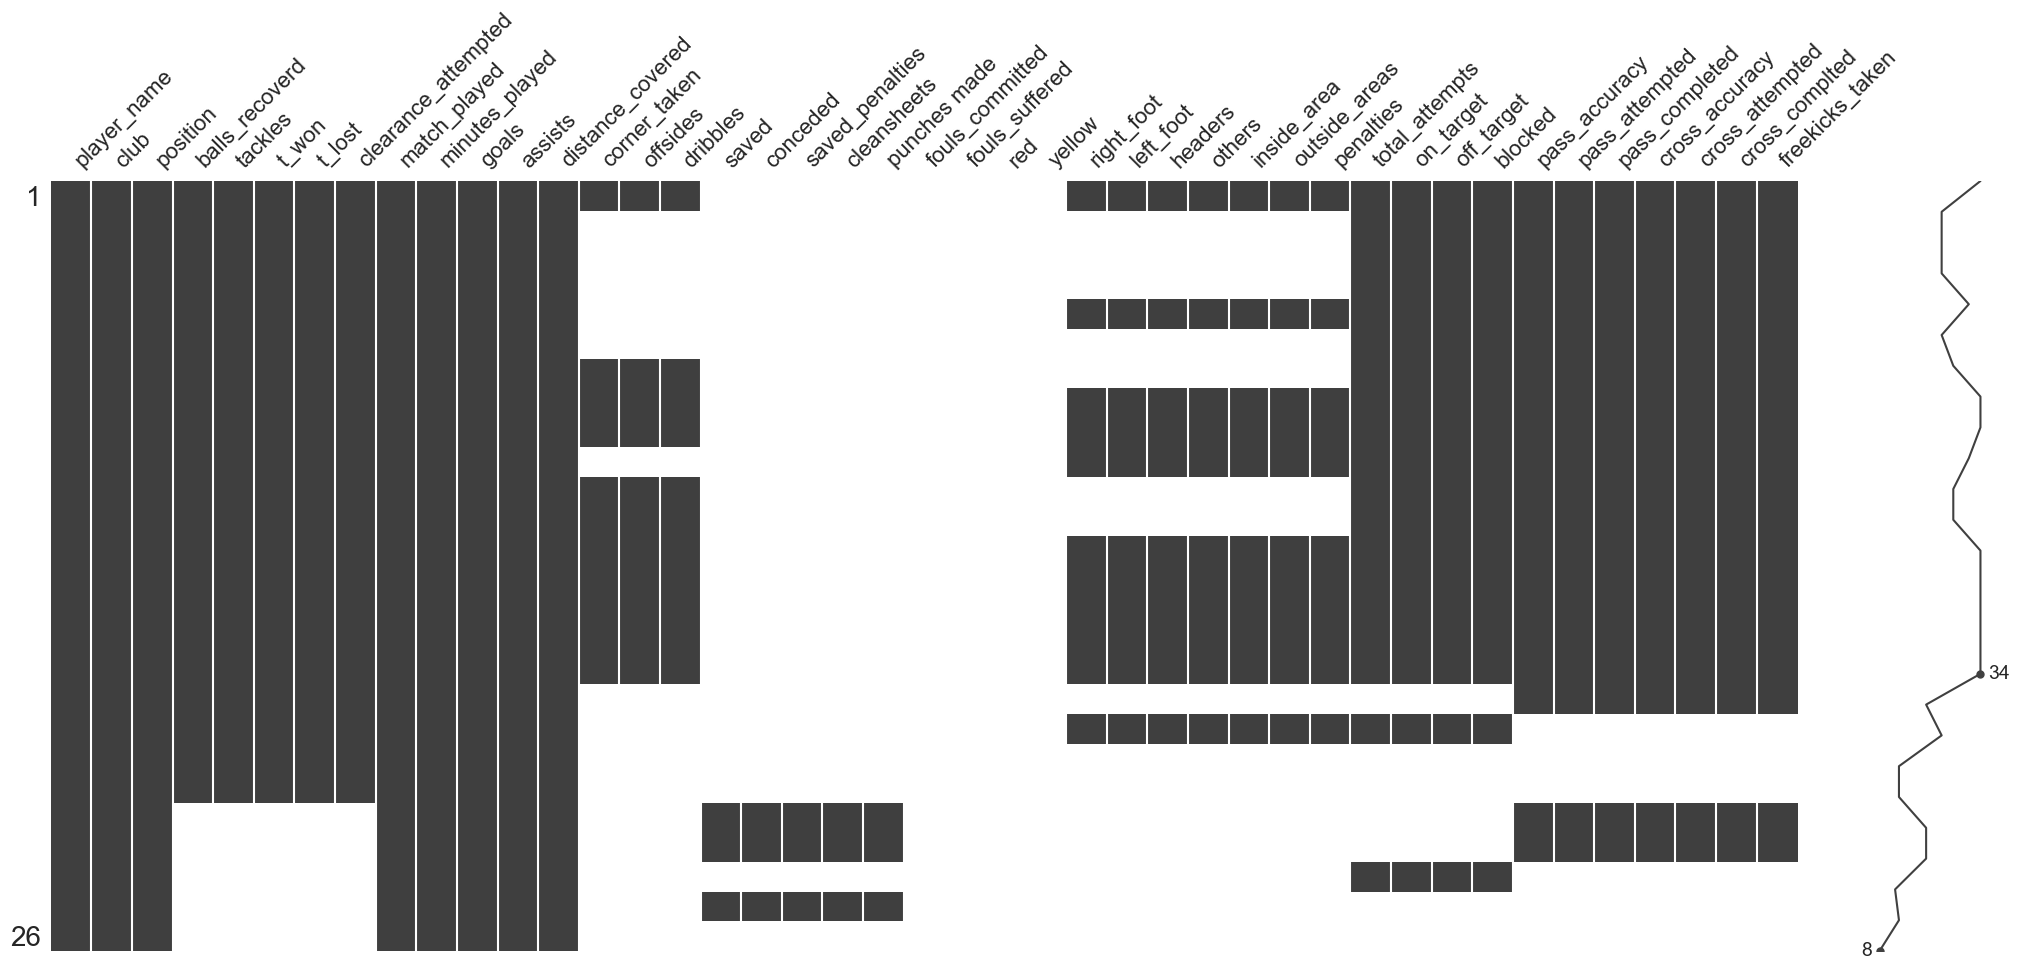

In [79]:
import missingno as msno
msno.matrix(df)

> Observation: After merging, many data points are missing.

> These values are missing because in all datasets all players are not available. As an example: the "Goal Keeping" dataset only has the information of the Goalkeeper. So, for other players the columns are empty.

 In this step, we will fill all the missing values with 0 by using fillna() method. After that we will visualize again.

In [80]:
df = df.fillna(0)

<Axes: >

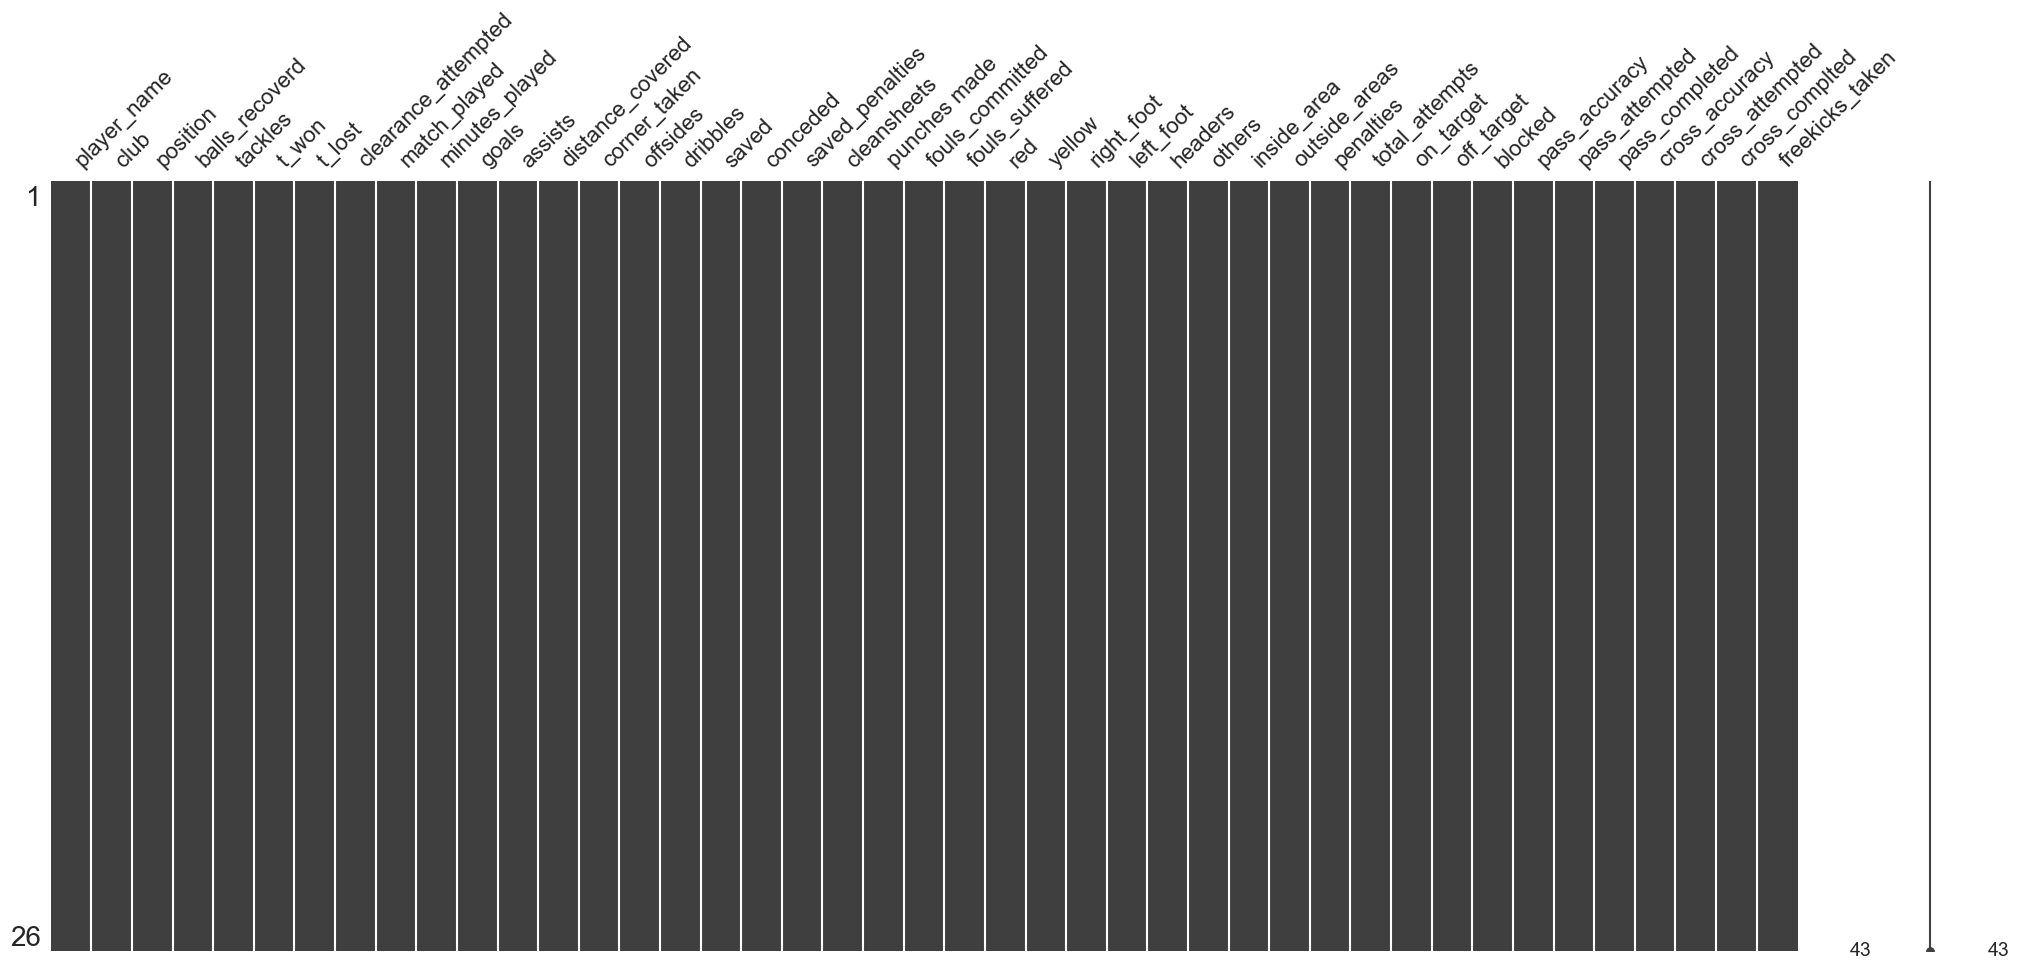

In [81]:
msno.matrix(df)

> Observation: No more missing values.

Now we will use describe, info, and columns method to know the dataset description, information, and columns to understand the data more deeply.

In [82]:
df.describe()

,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played,minutes_played,goals,assists,corner_taken,...,on_target,off_target,blocked,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,17.230769,3.961538,1.461538,2.500000,4.307692,6.730769,469.384615,1.076923,0.884615,3.192308,...,2.615385,2.269231,2.538462,68.600000,288.884615,260.807692,10.615385,8.576923,2.038462,5.653846
std,18.153364,3.944422,2.336335,2.657066,6.038339,4.025496,336.346973,1.718676,1.210848,7.478071,...,4.079970,2.973990,3.152533,38.480759,240.750714,222.388492,14.099864,13.381100,3.399774,5.959479
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.250000,0.250000,0.000000,0.000000,0.000000,1.500000,90.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,81.475000,34.000000,31.750000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,3.000000,1.000000,2.000000,1.000000,8.000000,539.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,87.600000,289.000000,249.000000,0.000000,1.000000,0.000000,3.500000
75%,29.500000,6.000000,1.750000,4.000000,7.250000,10.000000,716.500000,1.750000,2.000000,0.750000,...,3.750000,3.750000,4.000000,91.400000,448.000000,402.250000,23.000000,12.500000,2.750000,9.500000
max,56.000000,14.000000,10.000000,10.000000,19.000000,12.000000,1003.000000,7.000000,4.000000,30.000000,...,18.000000,9.000000,11.000000,95.000000,806.000000,760.000000,40.000000,49.000000,12.000000,21.000000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_name          26 non-null     object 
 1   club                 26 non-null     object 
 2   position             26 non-null     object 
 3   balls_recoverd       26 non-null     float64
 4   tackles              26 non-null     float64
 5   t_won                26 non-null     float64
 6   t_lost               26 non-null     float64
 7   clearance_attempted  26 non-null     float64
 8   match_played         26 non-null     int64  
 9   minutes_played       26 non-null     int64  
 10  goals                26 non-null     int64  
 11  assists              26 non-null     int64  
 12  distance_covered     26 non-null     object 
 13  corner_taken         26 non-null     float64
 14  offsides             26 non-null     float64
 15  dribbles             26 non-null     float

In [84]:
df.columns

Index(['player_name', 'club', 'position', 'balls_recoverd', 'tackles', 't_won',
       't_lost', 'clearance_attempted', 'match_played', 'minutes_played',
       'goals', 'assists', 'distance_covered', 'corner_taken', 'offsides',
       'dribbles', 'saved', 'conceded', 'saved_penalties', 'cleansheets',
       'punches made', 'fouls_committed', 'fouls_suffered', 'red', 'yellow',
       'right_foot', 'left_foot', 'headers', 'others', 'inside_area',
       'outside_areas', 'penalties', 'total_attempts', 'on_target',
       'off_target', 'blocked', 'pass_accuracy', 'pass_attempted',
       'pass_completed', 'cross_accuracy', 'cross_attempted', 'cross_complted',
       'freekicks_taken'],
      dtype='object')

 Finally, our dataset is completely ready and we can visualize it

Relationship between tackle and t_won 

<Axes: xlabel='tackles', ylabel='t_won'>

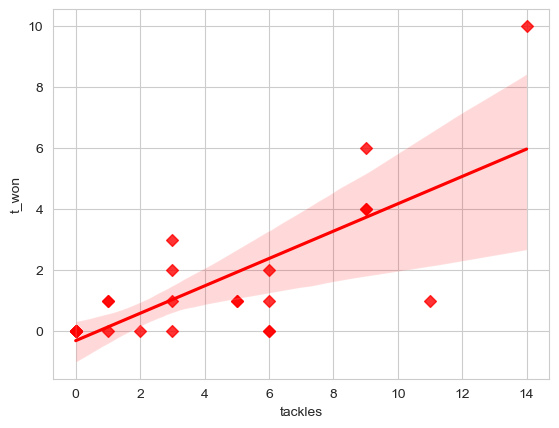

In [85]:
sns.set_style("whitegrid")
sns.regplot(x = "tackles", y = "t_won", data = df, marker = "D", color = "r")

> Observation: We can clearly say that more tackles mean more t_won.

Relationship between match_played and the minutes_played 

<Axes: xlabel='match_played', ylabel='minutes_played'>

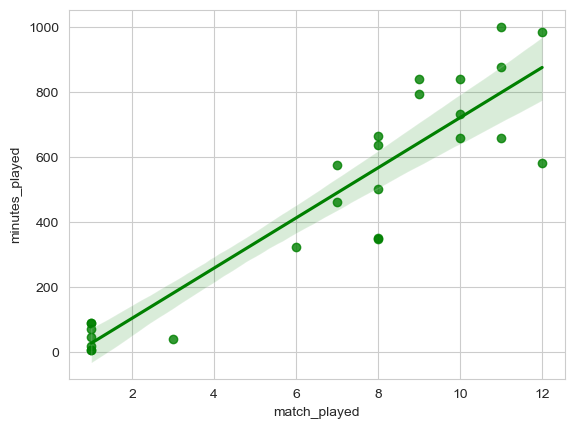

In [86]:
sns.regplot(x = "match_played", y = "minutes_played", data = df, marker = "o", color = "g")

> Observation: As expected, more matches played means more minutes played.

 Goal Score

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'João Cancelo'),
  Text(1, 0, 'Walker'),
  Text(2, 0, 'Bernardo Silva'),
  Text(3, 0, 'Mahrez'),
  Text(4, 0, 'Aké'),
  Text(5, 0, 'De Bruyne'),
  Text(6, 0, 'Grealish'),
  Text(7, 0, 'Foden'),
  Text(8, 0, 'Sterling'),
  Text(9, 0, 'Jesus'),
  Text(10, 0, 'Palmer')])

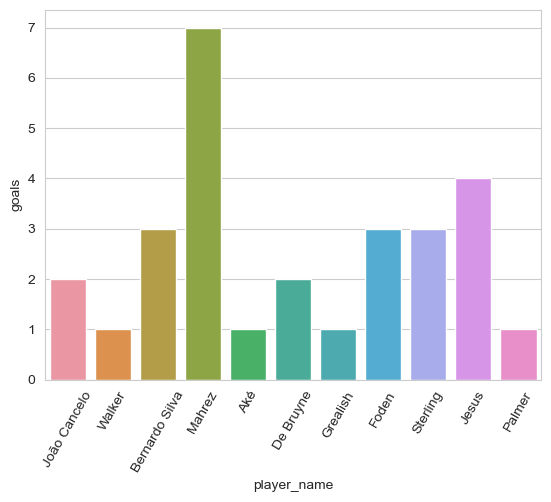

In [87]:
goal_df = df[df["goals"] > 0]
sns.barplot(y = "goals" , x = "player_name", data = goal_df)
plt.xticks(rotation = 60)

> Observation: WOW! Mahrez! 7 goals in a UCL Season. Is not he the most valuable player?

 Assists

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'João Cancelo'),
  Text(1, 0, 'Zinchenko'),
  Text(2, 0, 'Bernardo Silva'),
  Text(3, 0, 'Mahrez'),
  Text(4, 0, 'Fernandinho'),
  Text(5, 0, 'Gündoğan'),
  Text(6, 0, 'De Bruyne'),
  Text(7, 0, 'Grealish'),
  Text(8, 0, 'Foden'),
  Text(9, 0, 'Sterling'),
  Text(10, 0, 'Jesus')])

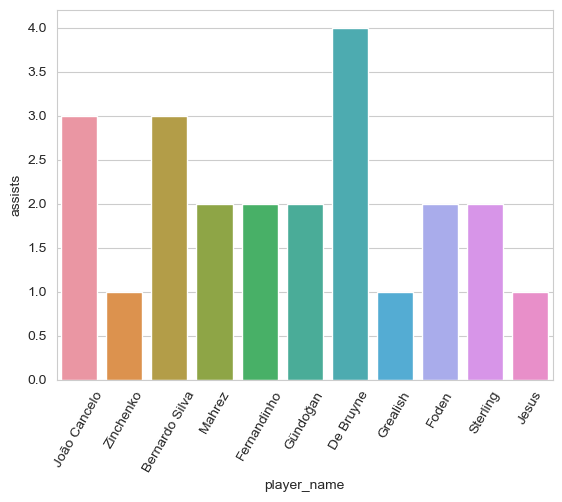

In [88]:
assists_df = df[df["assists"] > 0]
sns.barplot(y = "assists" , x = "player_name", data = assists_df)
plt.xticks(rotation = 60)

> Observation: De Bruyne tops in assists. João Cancelo and Bernardo silva are also good in assists. Man. city should definitely value them in the next season.

 Goal Keeper Stats

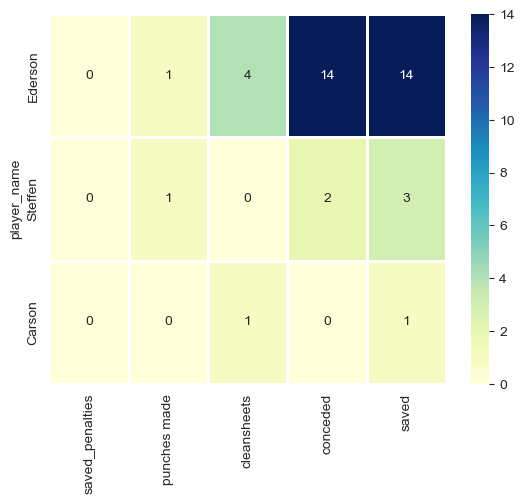

In [89]:
goal_keeper = df[df["position"] == "Goalkeeper"]
goal_keeper = goal_keeper[["player_name", "saved_penalties", "punches made", "cleansheets", "conceded", "saved"]].set_index("player_name")
sns.heatmap(goal_keeper, annot=True, linewidths=1, cmap="YlGnBu")
plt.show()

> Observation: Goalkeeper ederson saved 14 goals, 14 conceded, 4 clean sheets, 1 punches made and 0 penalty saved. Incredible Performance.

Compare Cross attempted and cross completed

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'João Cancelo'),
  Text(1, 0, 'Rodri'),
  Text(2, 0, 'Walker'),
  Text(3, 0, 'Stones'),
  Text(4, 0, 'Zinchenko'),
  Text(5, 0, 'Bernardo Silva'),
  Text(6, 0, 'Mahrez'),
  Text(7, 0, 'Fernandinho'),
  Text(8, 0, 'Gündoğan'),
  Text(9, 0, 'De Bruyne'),
  Text(10, 0, 'Grealish'),
  Text(11, 0, 'Foden'),
  Text(12, 0, 'Sterling'),
  Text(13, 0, 'Jesus'),
  Text(14, 0, 'Egan-Riley')])

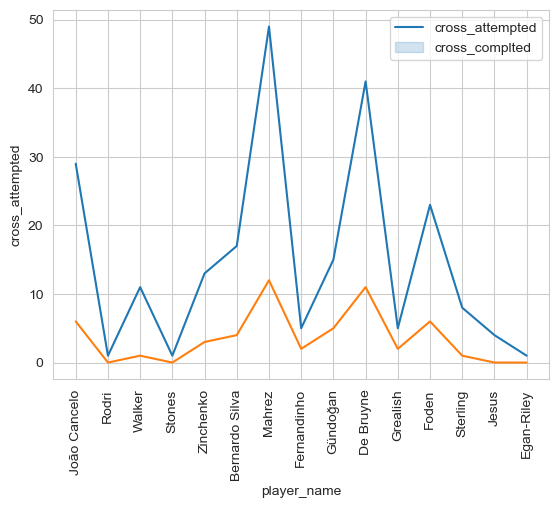

In [90]:
cross_df = df[df["cross_attempted"]>0]
sns.lineplot(y = "cross_attempted", x = "player_name", data = cross_df)
sns.lineplot(y = "cross_complted", x = "player_name", data = cross_df)
plt.legend(["cross_attempted","cross_complted"])
plt.xticks(rotation = 90)

> Observation: Mahrez made the highest attempt though he is also at the top in cross completed. The most cross completed by Mahrez. De Bruyne and Foden also good at cross complete.

Distance covered based on position

<Axes: xlabel='position', ylabel='distance_covered'>

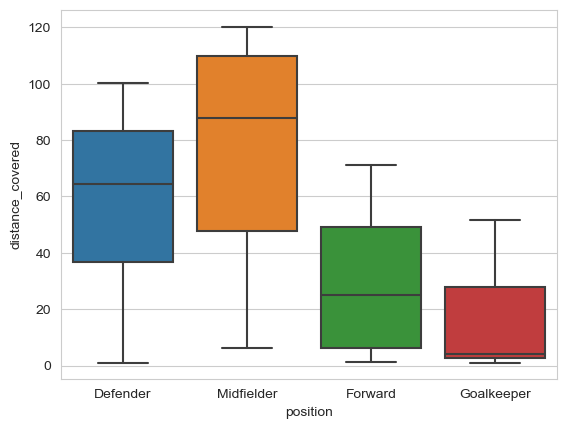

In [91]:
df["distance_covered"] = df["distance_covered"].astype(float)
sns.boxplot(x = "position", y = "distance_covered", data = df)

> Observation: We can see that the usually Midfielder covers more distance than the defender and forward player.

**Visualization 8: Fouls Committed and Fouls Suffered situation**

<Axes: xlabel='position', ylabel='fouls_committed'>

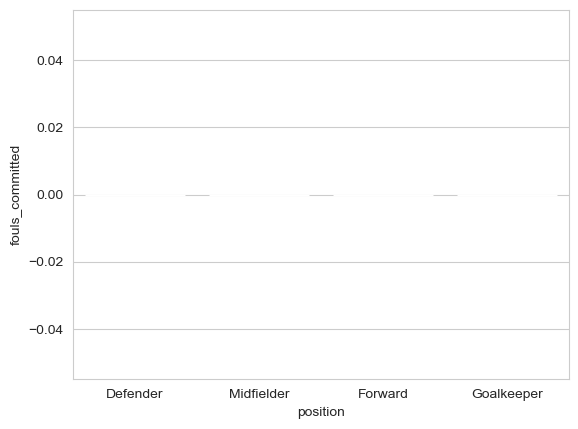

In [92]:
sns.barplot(x = "position", y = "fouls_committed", data = df)

<Axes: xlabel='position', ylabel='fouls_suffered'>

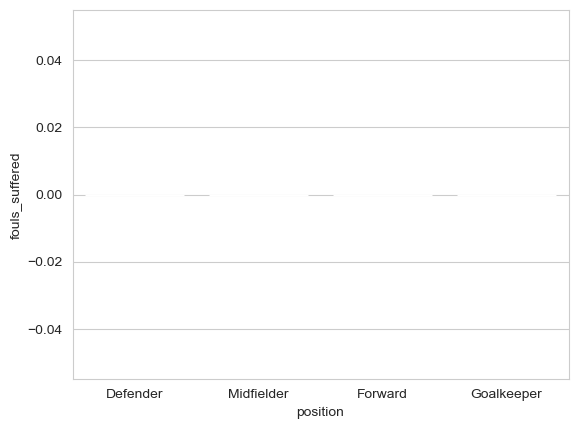

In [93]:
sns.barplot(x = "position", y = "fouls_suffered", data = df)

In [135]:
def plot_scatter(data, x, y, xlabel, ylabel, title='', hue=None, height=7, text_spacing=0.3):
    fgrid = sns.lmplot(data=data, x=x, y=y, hue=hue, height=height, aspect=1.5)
    ax = fgrid.axes[0,0]
    
    plt.title(f"{title} {xlabel}/{ylabel}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    for i, row in data.iterrows():
        ax.text(row[x] + text_spacing, row[y], row['player_name'], fontsize=7)


In [136]:
forwards_df = df[(df['goals'] > 0) & (df['position'] == 'Forward')].reset_index(drop=True)
forward_cols = ['player_name', 'club', 'goals', 'offsides', 'assists']
forwards_df.loc[:, forward_cols].head()

,player_name,club,goals,offsides,assists
0,Sterling,Man. City,3,6.0,2
1,Jesus,Man. City,4,4.0,1


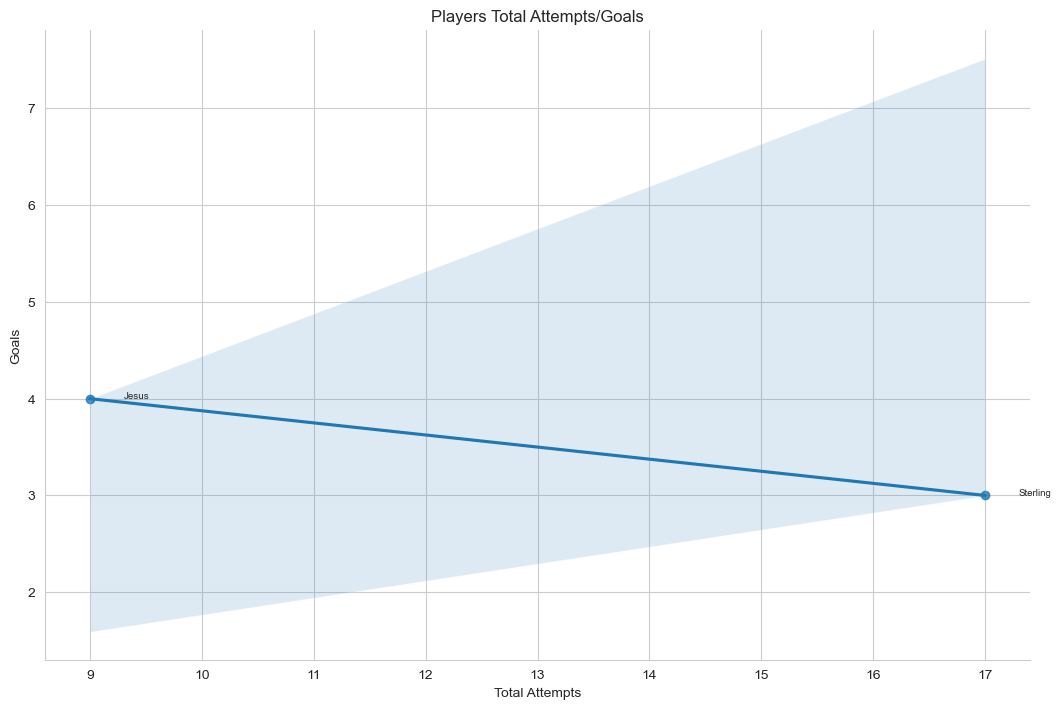

In [137]:
plot_scatter(forwards_df, 'total_attempts', 'goals', xlabel='Total Attempts', ylabel='Goals', title='Players')

By looking at this chart, a few players that are worth highlighting are sterling and jesus, whose goals tally falls in the  projected line for fowards.



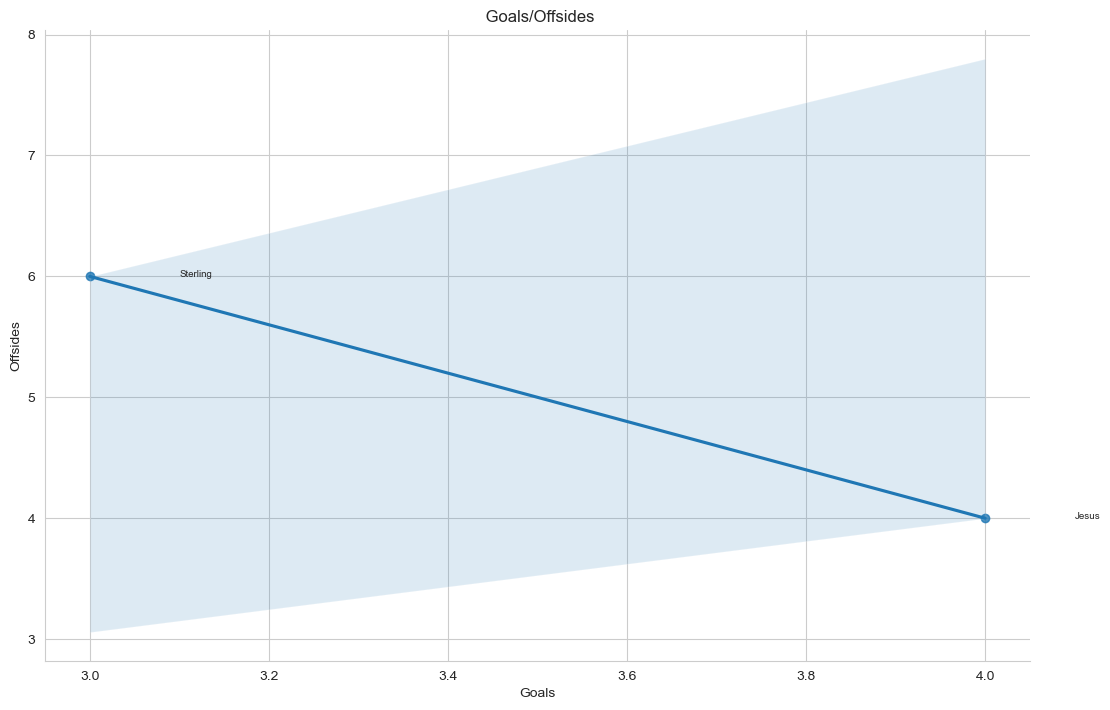

In [138]:
plot_scatter(forwards_df, 'goals', 'offsides', xlabel='Goals', ylabel='Offsides', text_spacing=0.1)

In [139]:
forwards_df['goal_contributions'] = forwards_df['goals'] + forwards_df['assists']
forward_cols.append('goal_contributions')
forwards_df.loc[:, forward_cols].sort_values('goal_contributions', ascending=False).head()

,player_name,club,goals,offsides,assists,goal_contributions
0,Sterling,Man. City,3,6.0,2,5
1,Jesus,Man. City,4,4.0,1,5


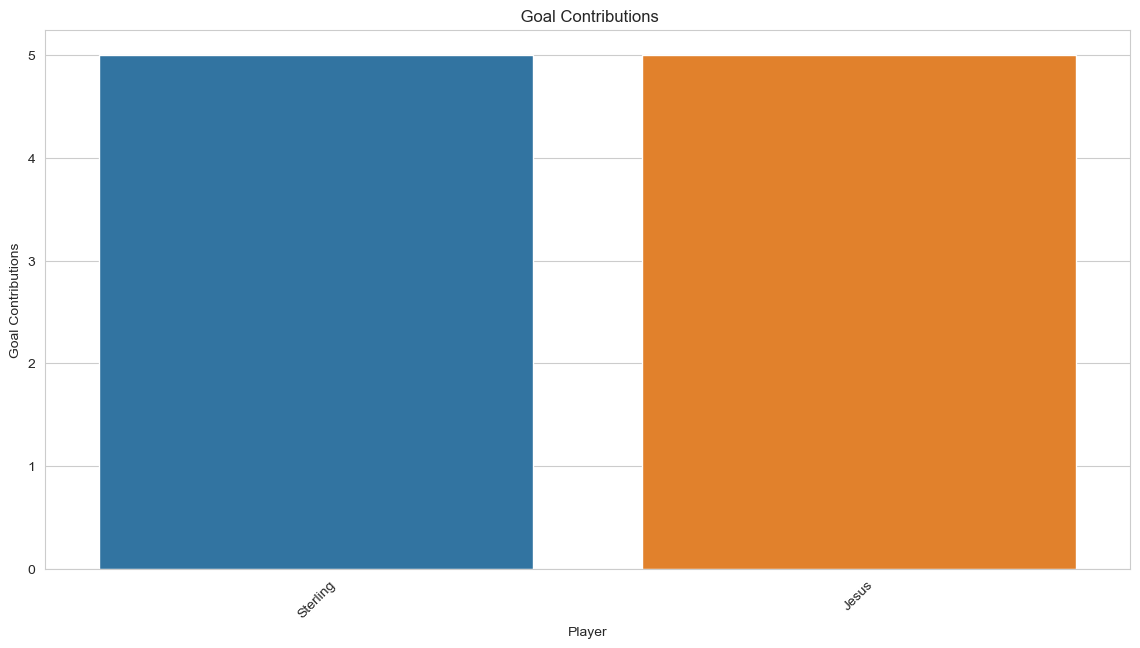

In [140]:
def plot_bar(df, y, ylabel, title=''):
    plt.figure(figsize=(14,7))
    bar_plot = sns.barplot(data=df, x='player_name', y=y)
    
    plt.title(f"{title} {ylabel}")
    plt.xlabel('Player')
    plt.ylabel(ylabel)
    
    for item in bar_plot.get_xticklabels():
        item.set_rotation(45)
    
forwards_df = forwards_df.sort_values('goal_contributions', ascending=False).reset_index(drop=True)
plot_bar(forwards_df.loc[:20, :], 'goal_contributions', ylabel='Goal Contributions')

In [141]:
min_played_threshold = 180
forwards_df = forwards_df[forwards_df['minutes_played'] > min_played_threshold].reset_index(drop=True)

In [142]:
forwards_df['goal_contributions_by_min'] = forwards_df['goal_contributions'] / forwards_df['minutes_played']
forward_cols.append('goal_contributions_by_min')
forwards_df.loc[:, forward_cols].head()

,player_name,club,goals,offsides,assists,goal_contributions,goal_contributions_by_min
0,Sterling,Man. City,3,6.0,2,5,0.008606
1,Jesus,Man. City,4,4.0,1,5,0.014205


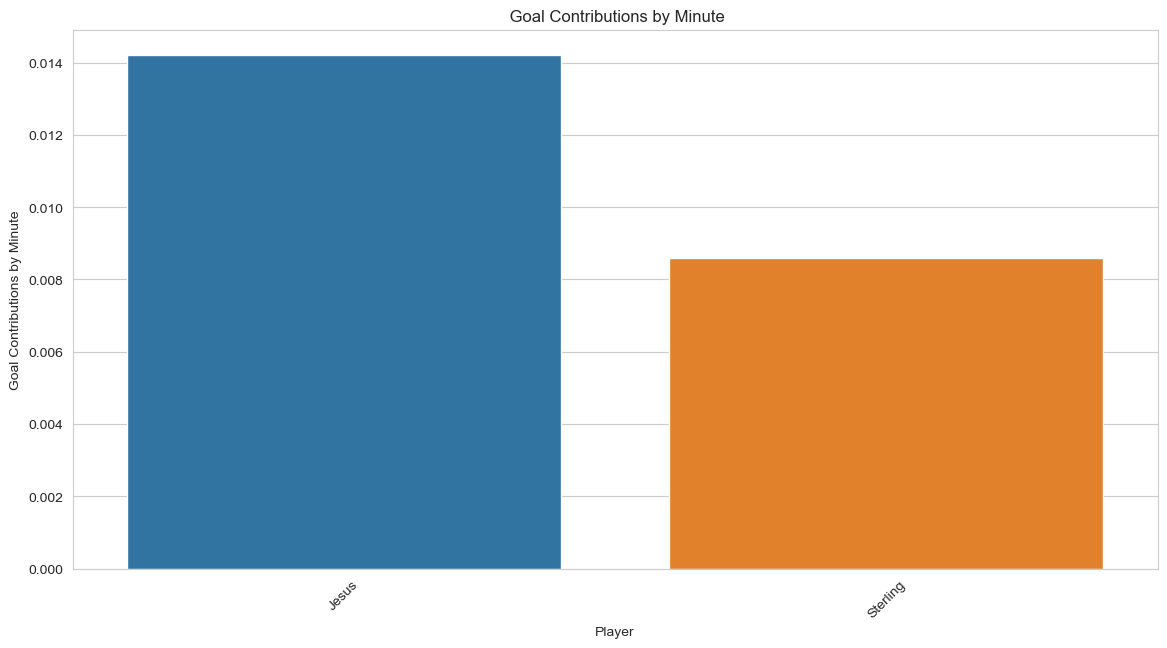

In [143]:
forwards_df = forwards_df.sort_values('goal_contributions_by_min', ascending=False).reset_index(drop=True)
plot_bar(forwards_df.loc[:20, :], 'goal_contributions_by_min', ylabel='Goal Contributions by Minute')

In [144]:
midfielders_df = df[df['position'] == 'Midfielder'].sort_values('pass_accuracy', ascending=False).reset_index(drop=True)
midfielder_cols = ['player_name', 'club', 'pass_accuracy', 'pass_attempted', 'pass_completed', 'assists']
midfielders_df.loc[:, midfielder_cols].head()

,player_name,club,pass_accuracy,pass_attempted,pass_completed,assists
0,Rodri,Man. City,94.2,806.0,760.0,0
1,Bernardo Silva,Man. City,91.6,462.0,427.0,3
2,Gündoğan,Man. City,90.8,406.0,367.0,2
3,Grealish,Man. City,87.2,243.0,214.0,1
4,Fernandinho,Man. City,85.3,291.0,254.0,2


In [145]:
pass_threshold = midfielders_df.pass_attempted.mean()
print('Pass threshold:', pass_threshold)

Pass threshold: 337.4


In [146]:
midfielders_df = midfielders_df[midfielders_df['pass_attempted'] > pass_threshold].sort_values('pass_accuracy', ascending=False).reset_index(drop=True)
midfielders_df.loc[:, midfielder_cols].head()

,player_name,club,pass_accuracy,pass_attempted,pass_completed,assists
0,Rodri,Man. City,94.2,806.0,760.0,0
1,Bernardo Silva,Man. City,91.6,462.0,427.0,3
2,Gündoğan,Man. City,90.8,406.0,367.0,2
3,Mahrez,Man. City,84.9,482.0,414.0,2
4,De Bruyne,Man. City,82.6,397.0,334.0,4


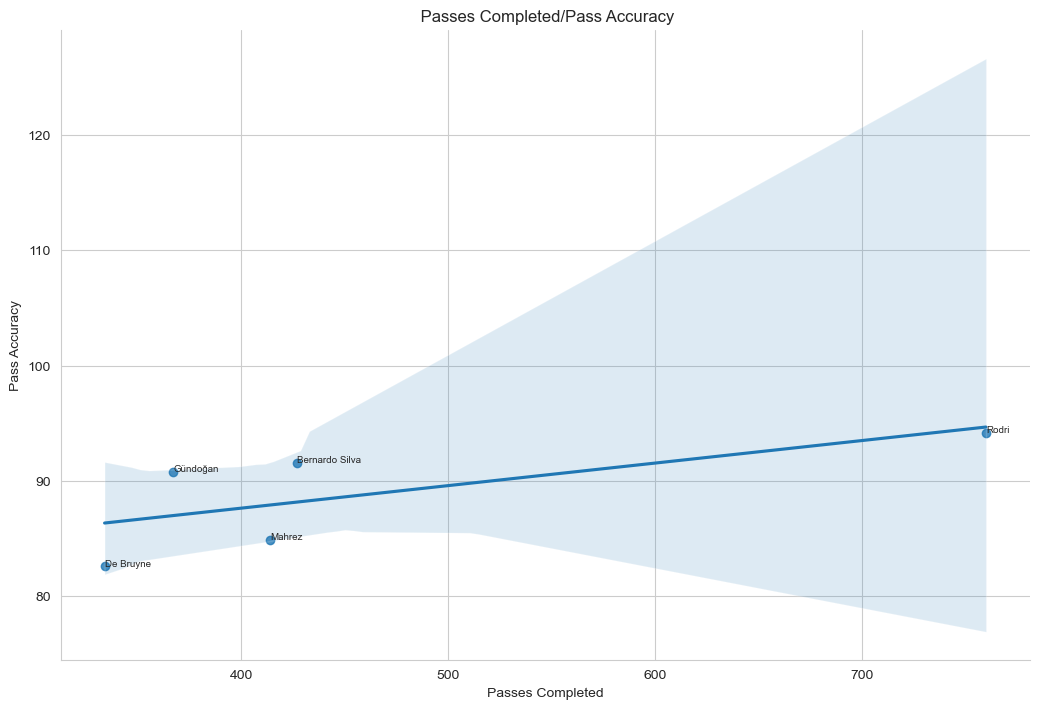

In [147]:
plot_scatter(midfielders_df, 'pass_completed', 'pass_accuracy', xlabel='Passes Completed', ylabel='Pass Accuracy', text_spacing=0.2)

In [148]:
midfielders_df['assists_per_min'] = midfielders_df['assists'] / midfielders_df['minutes_played']
midfielder_cols.append('assists_per_min')
midfielders_df = midfielders_df.sort_values('assists_per_min', ascending=False).reset_index(drop=True)
midfielders_df.loc[:, midfielder_cols].head()

,player_name,club,pass_accuracy,pass_attempted,pass_completed,assists,assists_per_min
0,De Bruyne,Man. City,82.6,397.0,334.0,4,0.005450
1,Bernardo Silva,Man. City,91.6,462.0,427.0,3,0.003417
2,Gündoğan,Man. City,90.8,406.0,367.0,2,0.003030
3,Mahrez,Man. City,84.9,482.0,414.0,2,0.002028
4,Rodri,Man. City,94.2,806.0,760.0,0,0.000000


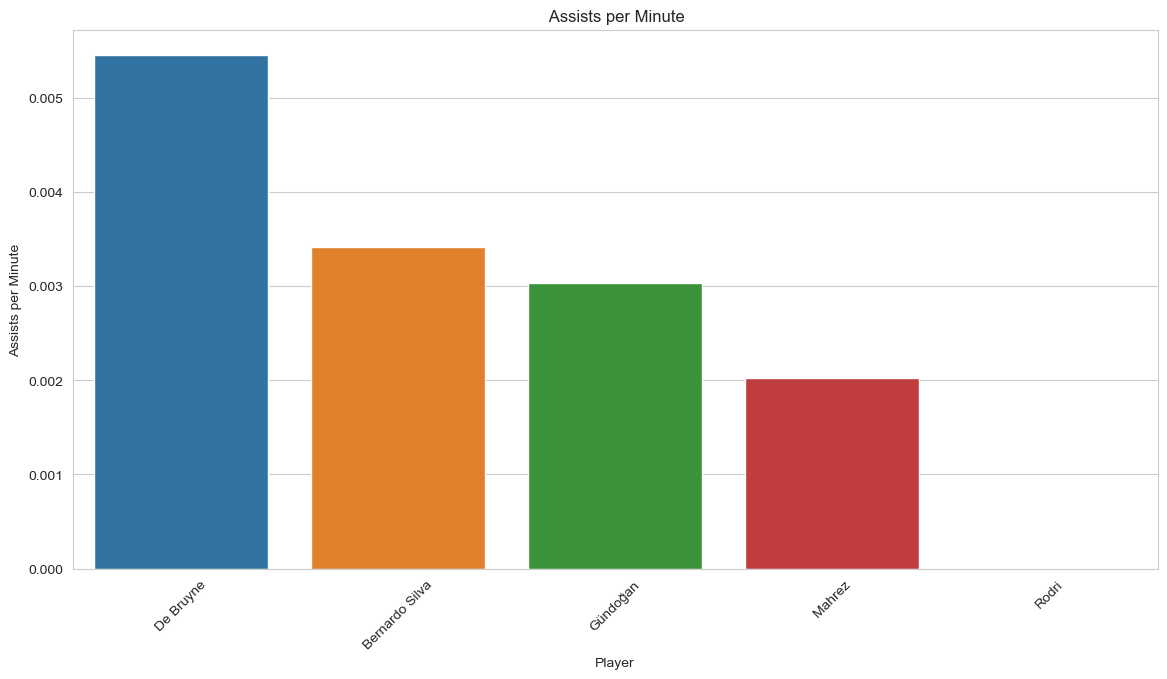

In [149]:
plot_bar(midfielders_df.loc[:20, :], 'assists_per_min', ylabel='Assists per Minute')

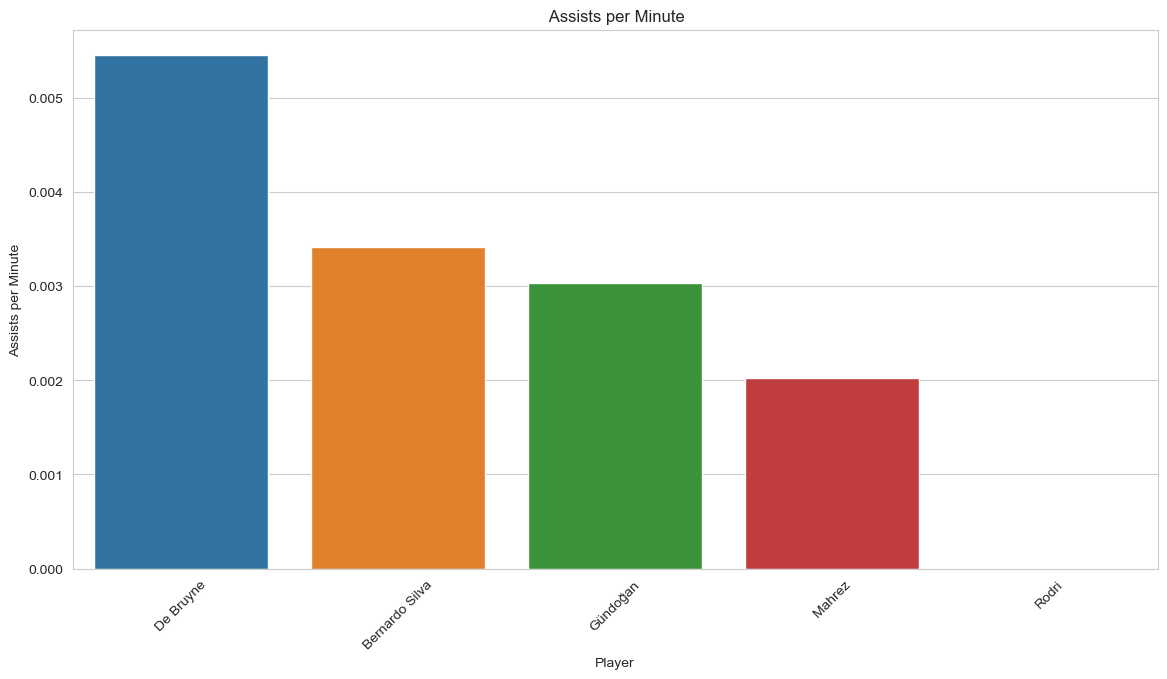

In [150]:
plot_bar(midfielders_df.loc[:20, :], 'assists_per_min', ylabel='Assists per Minute')

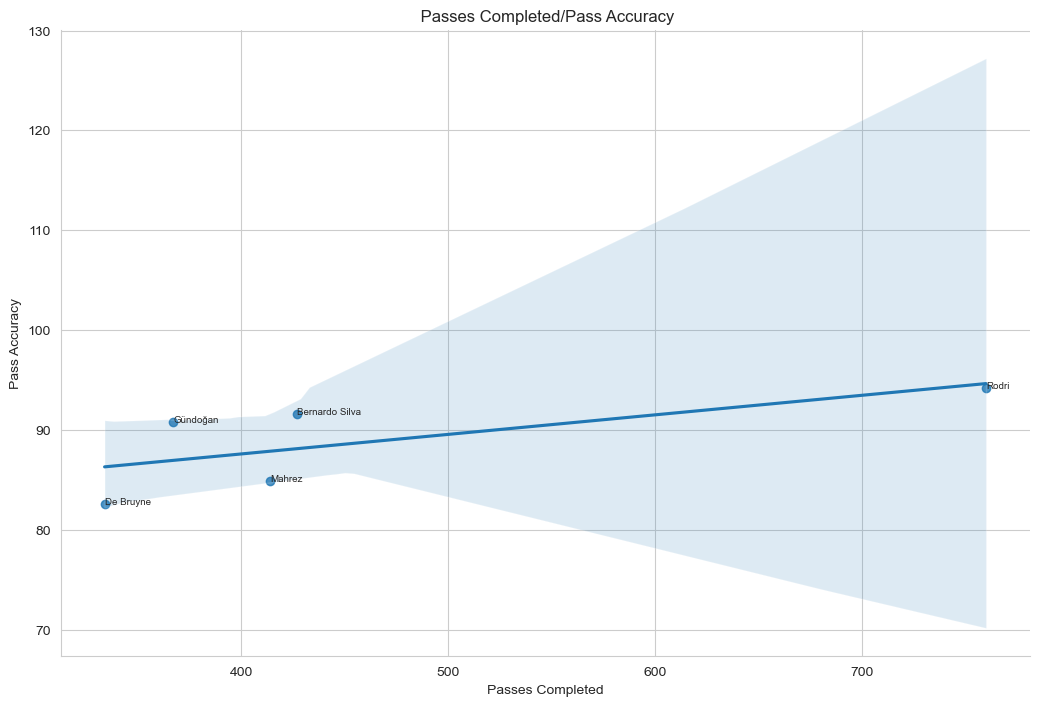

In [151]:
plot_scatter(midfielders_df.loc[:20, :], 'pass_completed', 'pass_accuracy', xlabel='Passes Completed', ylabel='Pass Accuracy', text_spacing=0.1)

In [152]:
df['clearances_per_min'] = df['clearance_attempted'] / df['minutes_played']
df['tackle_pct'] = (df['t_won'] * 100) / df['tackles']

defender_cols = ['player_name', 'club', 't_won', 'tackles', 'fouls_committed', 'tackle_pct', 'clearance_attempted', 'clearances_per_min']

defenders_df = df[(df['position'] == 'Defender') & (df['minutes_played'] >= min_played_threshold)].reset_index(drop=True)
defenders_df.loc[:, defender_cols].head()

,player_name,club,t_won,tackles,fouls_committed,tackle_pct,clearance_attempted,clearances_per_min
0,João Cancelo,Man. City,6.0,9.0,0.0,66.666667,13.0,0.015476
1,Laporte,Man. City,1.0,5.0,0.0,20.000000,17.0,0.021411
2,Rúben Dias,Man. City,1.0,11.0,0.0,9.090909,16.0,0.024096
3,Walker,Man. City,1.0,3.0,0.0,33.333333,11.0,0.019064
4,Stones,Man. City,1.0,1.0,0.0,100.000000,8.0,0.012559


In [153]:
avg_tackles = defenders_df['tackles'].mean()
print('Avg tackles:', avg_tackles)

Avg tackles: 5.428571428571429


In [154]:
defenders_df = defenders_df[defenders_df['tackles'] > avg_tackles].reset_index(drop=True)
defenders_df.loc[:, defender_cols].head()

,player_name,club,t_won,tackles,fouls_committed,tackle_pct,clearance_attempted,clearances_per_min
0,João Cancelo,Man. City,6.0,9.0,0.0,66.666667,13.0,0.015476
1,Rúben Dias,Man. City,1.0,11.0,0.0,9.090909,16.0,0.024096
2,Zinchenko,Man. City,2.0,6.0,0.0,33.333333,8.0,0.015968


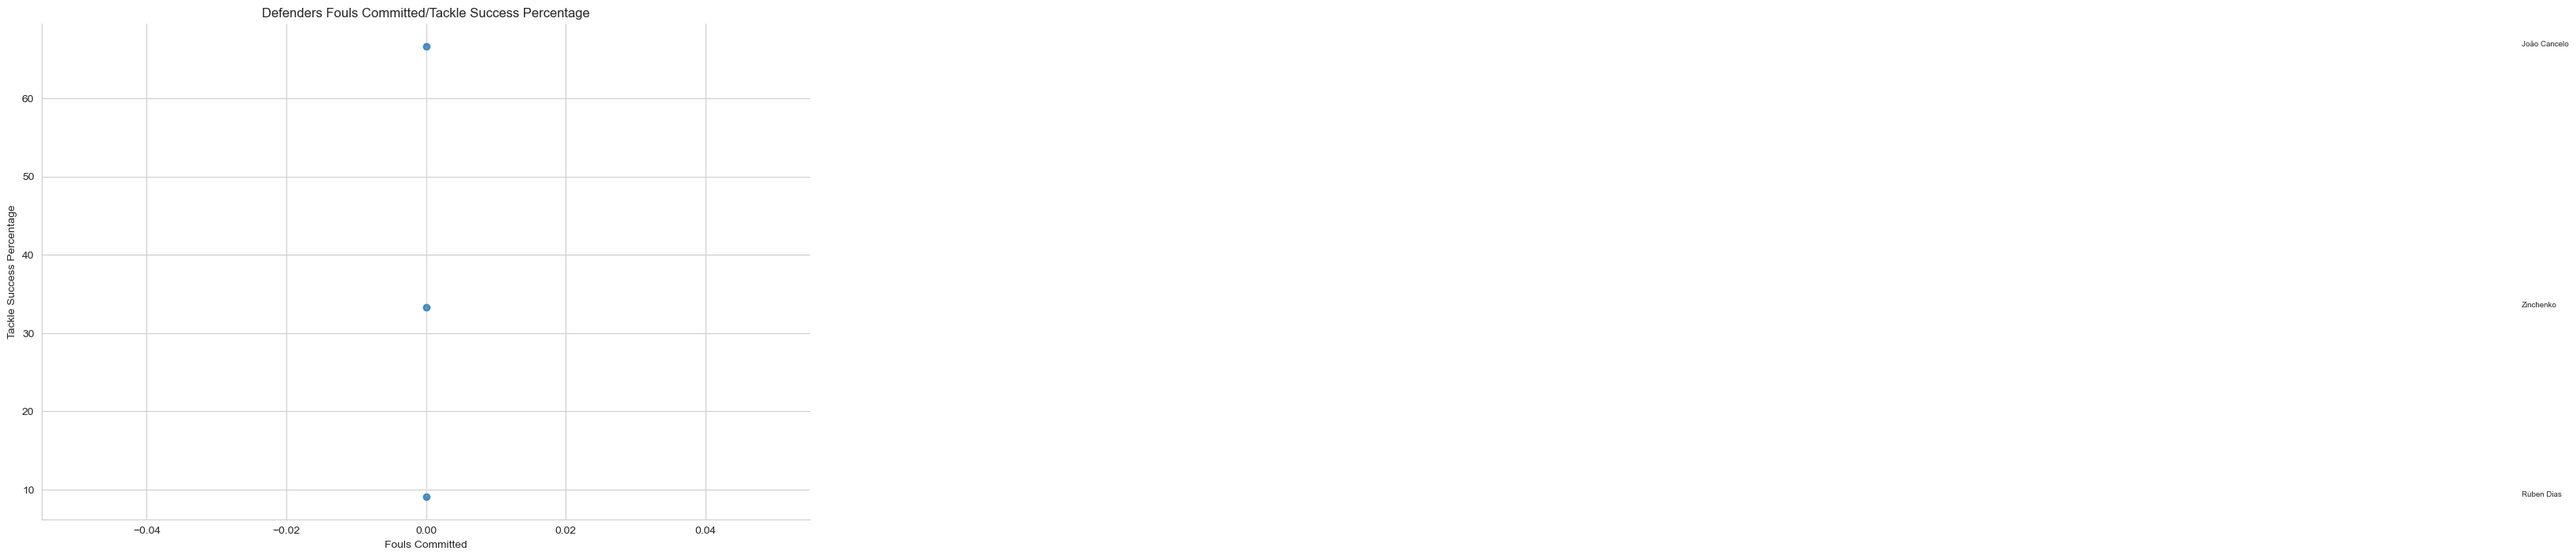

In [155]:
plot_scatter(defenders_df, 'fouls_committed', 'tackle_pct', xlabel='Fouls Committed', ylabel='Tackle Success Percentage', title='Defenders')

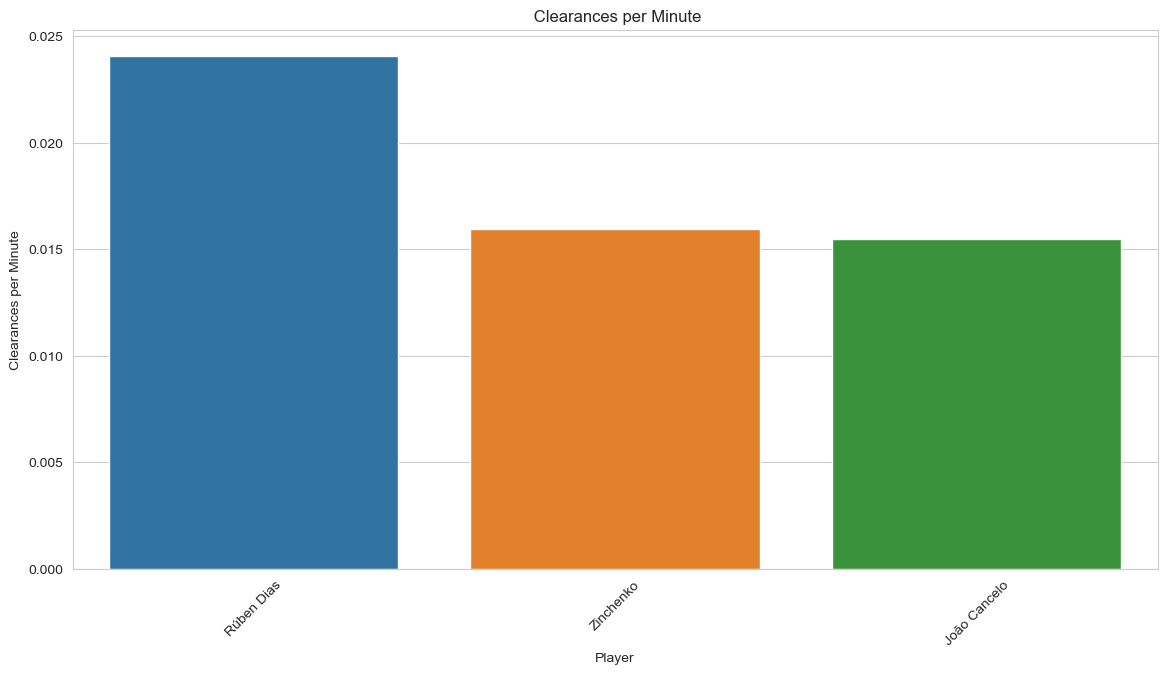

In [156]:
defenders_df = defenders_df.sort_values('clearances_per_min', ascending=False).reset_index(drop=True)
plot_bar(defenders_df.loc[:20, :], 'clearances_per_min', ylabel='Clearances per Minute')

In [157]:
keepers_df = df[df['position'] == 'Goalkeeper']
keeper_cols = ['player_name', 'club', 'saved', 'conceded', 'saved_penalties', 'cleansheets']
keepers_df.loc[:, keeper_cols].head()

,player_name,club,saved,conceded,saved_penalties,cleansheets
21,Ederson,Man. City,14.0,14.0,0.0,4.0
22,Steffen,Man. City,3.0,2.0,0.0,0.0
24,Carson,Man. City,1.0,0.0,0.0,1.0


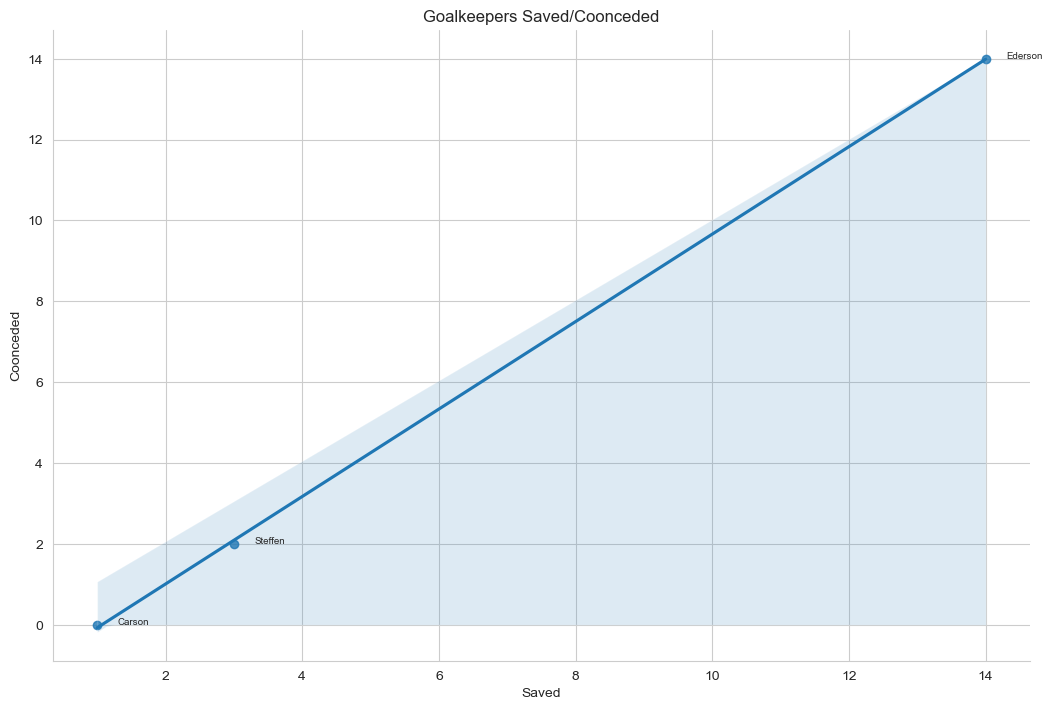

In [158]:
plot_scatter(keepers_df, 'saved', 'conceded', xlabel='Saved', ylabel='Coonceded', title='Goalkeepers')

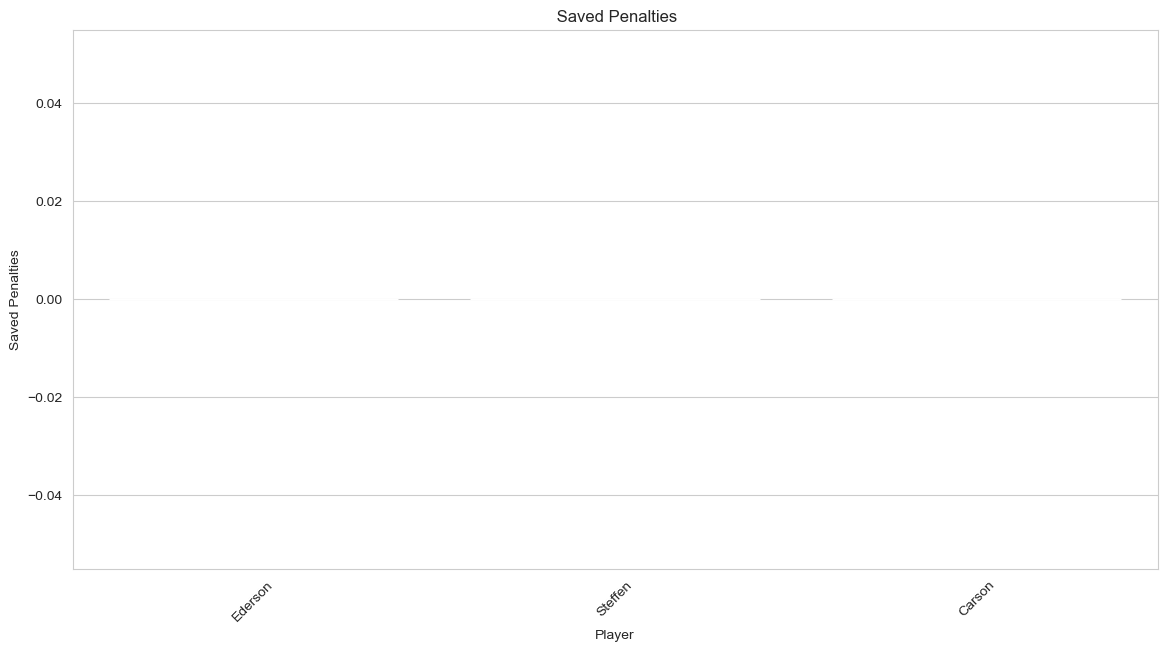

In [159]:
keepers_df = keepers_df.sort_values('saved_penalties', ascending=False).reset_index(drop=True)
plot_bar(keepers_df.loc[:5, :], 'saved_penalties', ylabel='Saved Penalties')

                                  TEAM OF THE TOURNAMENT
 To end it on an interesting note, let's build a team of the tournament based on everything that we've analyzed.

I'm gonna build a team with the 4-3-3 formation. For the attackers, I'm going to be considering scoring, for the midfielders, passing/assisting, and for the defenders, well, defending. Oh, and we already know that Courtois is going to be the keeper, so we don't have to worry about that.

Also, we are going to stick to the statistics, not worrying about who got furthest and who performed best in the most important moments.

In [123]:
team_keepers = ['Ederson']
team_keepers_df = keepers_df[keepers_df['player_name'].isin(team_keepers)].reset_index(drop=True)
team_keepers_df.loc[:, keeper_cols].head()

,player_name,club,saved,conceded,saved_penalties,cleansheets
0,Ederson,Man. City,14.0,14.0,0.0,4.0


In [130]:
team_defenders = [
    'João Cancelo','Laporte','Rúben Dias','Zinchenko'
]
team_defenders_df = defenders_df[defenders_df['player_name'].isin(team_defenders)].reset_index(drop=True)
team_defenders_df.loc[:, defender_cols].head()

,player_name,club,t_won,tackles,fouls_committed,tackle_pct,clearance_attempted,clearances_per_min
0,João Cancelo,Man. City,6.0,9.0,0.0,66.666667,13.0,0.015476
1,Laporte,Man. City,1.0,5.0,0.0,20.000000,17.0,0.021411
2,Rúben Dias,Man. City,1.0,11.0,0.0,9.090909,16.0,0.024096
3,Zinchenko,Man. City,2.0,6.0,0.0,33.333333,8.0,0.015968


In [131]:
team_mids = [
    'De Bruyne','Bernardo Silva','Gündoğan','Mahrez'
]
team_mids_df = midfielders_df[midfielders_df['player_name'].isin(team_mids)].reset_index(drop=True)
team_mids_df.loc[:, midfielder_cols].head()

,player_name,club,pass_accuracy,pass_attempted,pass_completed,assists,assists_per_min
0,De Bruyne,Man. City,82.6,397.0,334.0,4,0.005450
1,Bernardo Silva,Man. City,91.6,462.0,427.0,3,0.003417
2,Gündoğan,Man. City,90.8,406.0,367.0,2,0.003030
3,Mahrez,Man. City,84.9,482.0,414.0,2,0.002028


In [132]:
team_forwards = [
    'Sterling',
    'Jesus'
    
]
team_forwards_df = forwards_df[forwards_df['player_name'].isin(team_forwards)].reset_index(drop=True)
team_forwards_df.loc[:, forward_cols].head()

,player_name,club,goals,offsides,assists
0,Sterling,Man. City,3,6.0,2
1,Jesus,Man. City,4,4.0,1


In [134]:
tournament_team_Man_City = pd.concat([
    team_keepers_df,
    team_defenders_df,
    team_mids_df,
    team_forwards_df
])

tournament_team_Man_City.loc[:, ['player_name', 'position', 'club']].reset_index(drop=True).head(11)

,player_name,position,club
0,Ederson,Goalkeeper,Man. City
1,João Cancelo,Defender,Man. City
2,Laporte,Defender,Man. City
3,Rúben Dias,Defender,Man. City
4,Zinchenko,Defender,Man. City
5,De Bruyne,Midfielder,Man. City
6,Bernardo Silva,Midfielder,Man. City
7,Gündoğan,Midfielder,Man. City
8,Mahrez,Midfielder,Man. City
9,Sterling,Forward,Man. City
